In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
Data = pd.read_csv('motif_feature_vector_group_2.csv', encoding = "ISO-8859-1")

In [2]:
Data.head()

,ID,Species,Lk,P1P2,P3P4,hC,dK,dL,phi,Area,Perimeter,Eccentricity,CD,AB,CD/AB
0,1,1,0.122490,0.244684,0.249862,0.083052,0.003457,0.017602,64.177188,12816,0.040090,0.951008,68.594114,233.602110,0.293637
1,2,1,0.116376,0.247567,0.243658,0.081248,0.004430,0.016801,23.432626,12998,0.040239,0.951188,69.000007,237.196388,0.290898
2,3,1,0.106072,0.264595,0.247113,0.064979,0.005444,0.017563,77.753203,12945,0.040010,0.947297,69.583377,232.831033,0.298858
3,4,1,0.100475,0.249979,0.234652,0.075062,0.006403,0.020503,40.005291,12410,0.040555,0.944751,71.625572,228.206647,0.313863
4,5,1,0.109839,0.236233,0.252525,0.085421,0.006144,0.018098,28.416404,13093,0.039914,0.947095,71.854954,236.946491,0.303254


In [3]:
X = Data.values[:, 2:14]
Y = Data.values[:, 1]
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 40)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [4]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
Xlda = lda.fit_transform(X,Y)

In [5]:
lda.fit(X_train,y_train)
y_pred = lda.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,y_pred)*100

Accuracy is


(None, 72.25433526011561)

In [23]:
lda.decision_function(X_test)

array([[ -2.31656593,   1.71157384,  -9.36268979,   5.26629374,
        -13.21217165,  -8.04348811],
       [ -1.25369415,  -2.00282297,  -1.8196447 ,  -5.05650284,
         -9.71409379,  -5.6965659 ],
       [ -3.05276018,  -7.54825129,   0.42525521, -12.21957085,
          0.07092272,  -3.39228471],
       ...,
       [ -4.72536465,  -7.62757751,  -2.27440004, -11.78472216,
          0.43246199,  -0.15270129],
       [ -1.15703049,  -2.51297255,  -2.64613004,  -1.05517849,
        -10.06577046,  -8.10500038],
       [ -2.08192314,  -1.41580129,  -3.34927766,  -6.21904982,
         -9.16565108,  -3.52729938]])

In [6]:
#RF
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, random_state = 40)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [7]:
Y_pred = classifier.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,Y_pred)*100

Accuracy is


(None, 74.56647398843931)

In [8]:
#1->40
df1 = Data.sort_values('ID', ascending = True).groupby('Species').head(40)

In [9]:
print(df1)

      ID  Species        Lk      P1P2      P3P4        hC        dK        dL  \
0      1        1  0.122490  0.244684  0.249862  0.083052  0.003457  0.017602   
1      2        1  0.116376  0.247567  0.243658  0.081248  0.004430  0.016801   
2      3        1  0.106072  0.264595  0.247113  0.064979  0.005444  0.017563   
3      4        1  0.100475  0.249979  0.234652  0.075062  0.006403  0.020503   
4      5        1  0.109839  0.236233  0.252525  0.085421  0.006144  0.018098   
5      6        1  0.099778  0.279930  0.259261  0.053399  0.022223  0.006828   
6      7        1  0.096008  0.265378  0.262345  0.068284  0.007864  0.018008   
7      8        1  0.096308  0.270099  0.252855  0.072451  0.010358  0.020661   
8      9        1  0.101815  0.263829  0.256652  0.073561  0.015722  0.010510   
9     10        1  0.117209  0.268674  0.253818  0.077739  0.007434  0.023217   
10    11        1  0.107286  0.260640  0.262113  0.073146  0.005659  0.017064   
11    12        1  0.139370 

In [10]:
df1.shape

(240, 15)

In [11]:
X = df1.values[:, 2:14]
Y = df1.values[:, 1]
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 40)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [12]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
Xlda = lda.fit_transform(X,Y)

In [13]:
lda.fit(X_train,y_train)
y_pred = lda.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,y_pred)*100

Accuracy is


(None, 81.94444444444444)

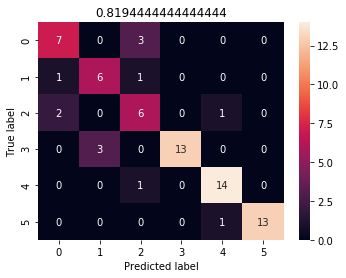

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
#RF
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, random_state = 40)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [16]:
Y_pred = classifier.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,Y_pred)*100

Accuracy is


(None, 86.11111111111111)

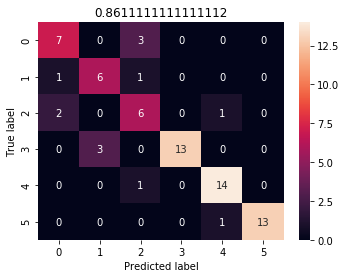

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, Y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
#Grid search

from sklearn.model_selection import GridSearchCV

 # use a full grid over all parameters
param_grid = {"max_depth": [None,5,4],
              "n_estimators":[100,200,400],
              #"max_features": ['auto'],
              #"min_samples_split": [2,3,5],
              "min_samples_leaf": [1,4,5],
              #"bootstrap": [True],
              "criterion": ["entropy","gini"],
              }
            

forest_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                 param_grid = param_grid,   
                 scoring="accuracy",  #metrics
                 cv = 3,              #cross-validation
                 n_jobs = 1)          #number of core

forest_grid.fit(X_train,y_train) #fit

forest_grid_best = forest_grid.best_estimator_ #best estimator
print("Best Model Parameter: ",forest_grid.best_params_)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Model Parameter:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}


In [31]:
#RF
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = None, min_samples_leaf = 1)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
Y_pred = classifier.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,Y_pred)*100

Accuracy is


(None, 87.5)

In [33]:
#1->50
df2 = Data.sort_values('ID', ascending = True).groupby('Species').head(50)

In [34]:
df2.shape

(300, 15)

In [35]:
X = df2.values[:, 2:14]
Y = df2.values[:, 1]
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 40)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [36]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
Xlda = lda.fit_transform(X,Y)
lda.fit(X_train,y_train)
y_pred = lda.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,y_pred)*100

Accuracy is


(None, 78.88888888888889)

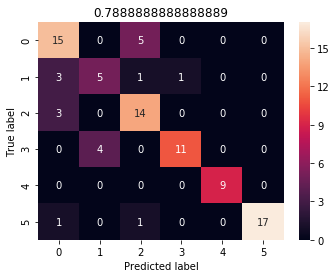

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
#RF
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, random_state = 40)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [39]:
Y_pred = classifier.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,Y_pred)*100

Accuracy is


(None, 80.0)

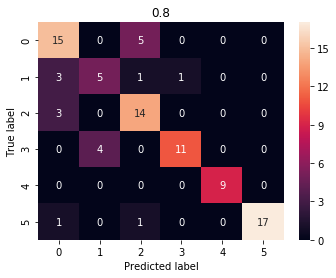

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, Y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
#1->70
df3 = Data.sort_values('ID', ascending = True).groupby('Species').head(70)
df3.shape

(420, 15)

In [42]:
X = df3.values[:, 2:14]
Y = df3.values[:, 1]
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 40)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [43]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
Xlda = lda.fit_transform(X,Y)
lda.fit(X_train,y_train)
y_pred = lda.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,y_pred)*100

Accuracy is


(None, 80.15873015873017)

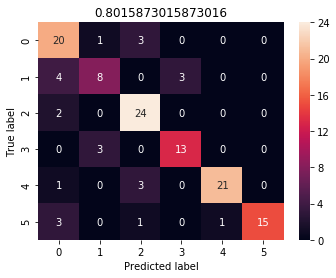

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [45]:
#RF
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, random_state = 40)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [46]:
Y_pred = classifier.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,Y_pred)*100

Accuracy is


(None, 78.57142857142857)

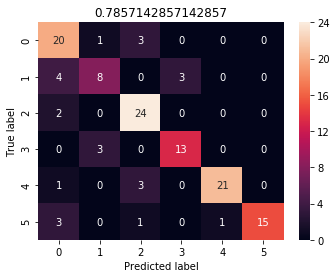

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, Y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [48]:
#1->80
df4 = Data.sort_values('ID', ascending = True).groupby('Species').head(80)

In [49]:
X = df4.values[:, 2:14]
Y = df4.values[:, 1]
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 40)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [50]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=5)
Xlda = lda.fit_transform(X,Y)
lda.fit(X_train,y_train)
y_pred = lda.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,y_pred)*100

Accuracy is


(None, 76.38888888888889)

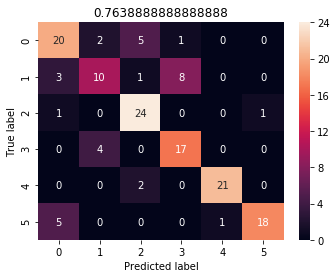

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [52]:
#RF
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, random_state = 40)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [53]:
Y_pred = classifier.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,Y_pred)*100

Accuracy is


(None, 75.0)

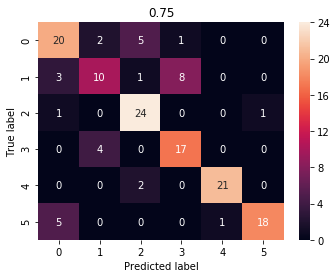

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, Y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [55]:
# Ve phan bo
# Ve line graph
# kse 2019, overleap

In [56]:
# Motil 1: 40
# Drop the id column
df1 = df1.drop('ID', axis=1)
# Convert the diagnosis column to numeric format
df1['Species'] = df1['Species'].factorize()[0]
# Fill all Null values with zero
df1 = df1.fillna(value=0)
# Store the diagnosis column in a target object and then drop it
target = df1['Species']
df1 = df1.drop('Species', axis=1)

In [57]:
# Turn dataframe into arrays
X = df1.values
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
# Taking in as second argument the Target as labels
X_LDA_2D = lda.fit_transform(X, target.values)

Text(0.5, 1.0, 'LDA Scatter Plot on motil 1 (40)')

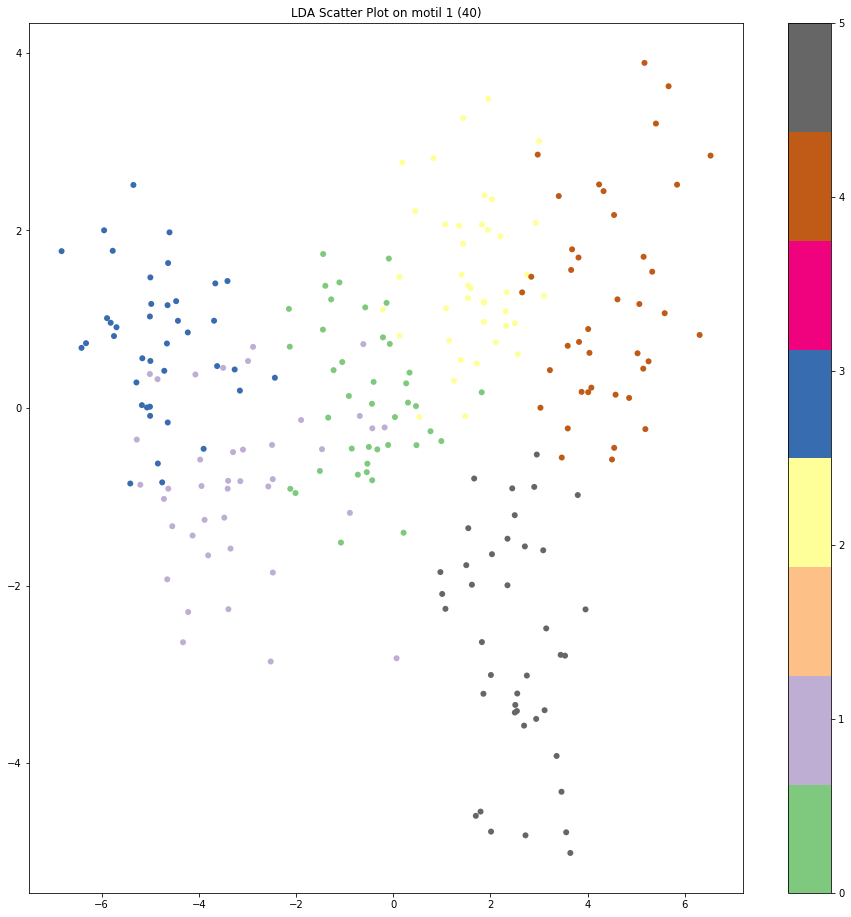

In [61]:
# Plot the LDA
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16,16))
#plt.subplot(121)
plt.scatter(X_LDA_2D[:,0],X_LDA_2D[:,1], c = target, 
            cmap = "Accent", edgecolor = "None")
plt.colorbar()
plt.title('LDA Scatter Plot on motil 1 (40)')

In [68]:
# plot the RF
#X = df1.values
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, random_state = 40)
# Taking in as second argument the Target as labels
#X_RF = rf.fit(X, target.values)

In [69]:
# Plot the RF
#import matplotlib.pyplot as plt
#%matplotlib inline
#plt.figure(figsize = (16,16))
#plt.subplot(121)
#plt.scatter(X_RF[:,0],X_RF[:,1], c = target, 
           # cmap = "Accent", edgecolor = "None")
#plt.colorbar()
#plt.title('LDA Scatter Plot on motil 1 (40)')

In [70]:
# Ve phan bo
# Ve line graph
# kse 2019, overleap

In [71]:
# Motil 2: 50
# Drop the id column
df2 = df2.drop('ID', axis=1)
# Convert the diagnosis column to numeric format
df2['Species'] = df2['Species'].factorize()[0]
# Fill all Null values with zero
df2 = df2.fillna(value=0)
# Store the diagnosis column in a target object and then drop it
target = df2['Species']
df2 = df2.drop('Species', axis=1)

In [72]:
# Turn dataframe into arrays
X = df2.values
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
# Taking in as second argument the Target as labels
X_LDA_2D = lda.fit_transform(X, target.values)

Text(0.5, 1.0, 'LDA Scatter Plot on motil 2 (50)')

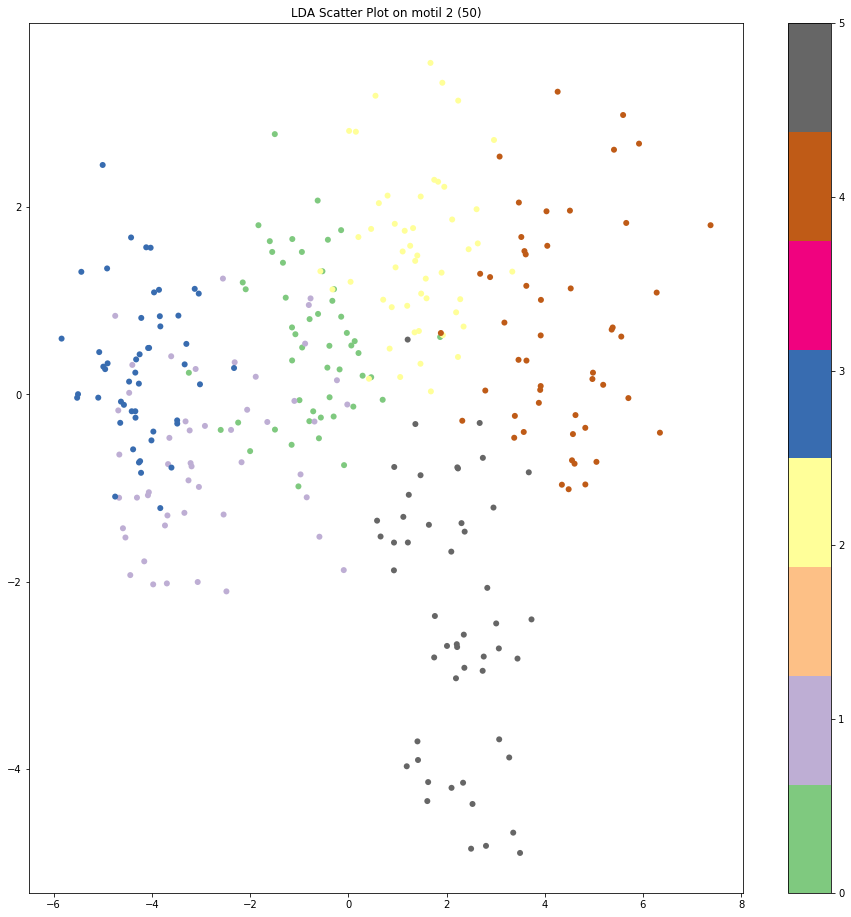

In [73]:
# Plot the LDA
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16,16))
#plt.subplot(121)
plt.scatter(X_LDA_2D[:,0],X_LDA_2D[:,1], c = target, 
            cmap = "Accent", edgecolor = "None")
plt.colorbar()
plt.title('LDA Scatter Plot on motil 2 (50)')

In [74]:
# Motil 3: 70
# Drop the id column
df3 = df3.drop('ID', axis=1)
# Convert the diagnosis column to numeric format
df3['Species'] = df3['Species'].factorize()[0]
# Fill all Null values with zero
df3 = df3.fillna(value=0)
# Store the diagnosis column in a target object and then drop it
target = df3['Species']
df3 = df3.drop('Species', axis=1)

Text(0.5, 1.0, 'LDA Scatter Plot on motil 3 (70)')

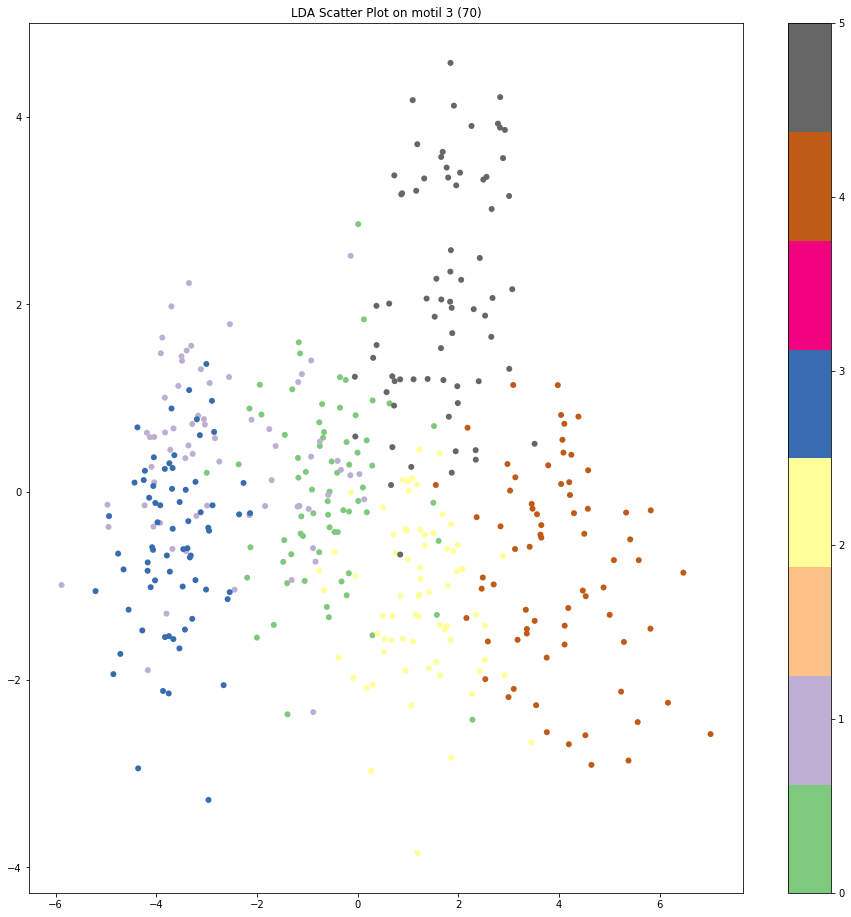

In [76]:
# Plot the LDA
# Turn dataframe into arrays
X = df3.values
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
# Taking in as second argument the Target as labels
X_LDA_2D = lda.fit_transform(X, target.values)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16,16))
#plt.subplot(121)
plt.scatter(X_LDA_2D[:,0],X_LDA_2D[:,1], c = target, 
            cmap = "Accent", edgecolor = "None")
plt.colorbar()
plt.title('LDA Scatter Plot on motil 3 (70)')

In [77]:
# Motil 4: 80
# Drop the id column
df4 = df4.drop('ID', axis=1)
# Convert the diagnosis column to numeric format
df4['Species'] = df4['Species'].factorize()[0]
# Fill all Null values with zero
df4 = df4.fillna(value=0)
# Store the diagnosis column in a target object and then drop it
target = df4['Species']
df4 = df4.drop('Species', axis=1)

Text(0.5, 1.0, 'LDA Scatter Plot on motil 4 (80)')

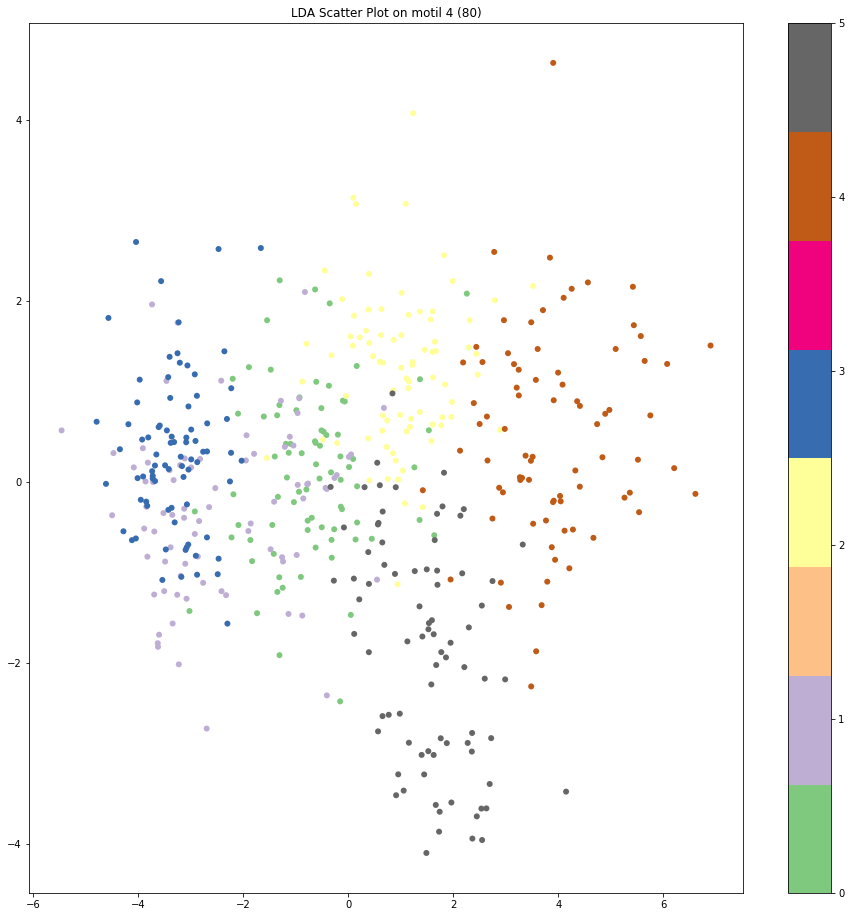

In [78]:
# Plot the LDA
# Turn dataframe into arrays
X = df4.values
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
# Taking in as second argument the Target as labels
X_LDA_2D = lda.fit_transform(X, target.values)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16,16))
#plt.subplot(121)
plt.scatter(X_LDA_2D[:,0],X_LDA_2D[:,1], c = target, 
            cmap = "Accent", edgecolor = "None")
plt.colorbar()
plt.title('LDA Scatter Plot on motil 4 (80)')

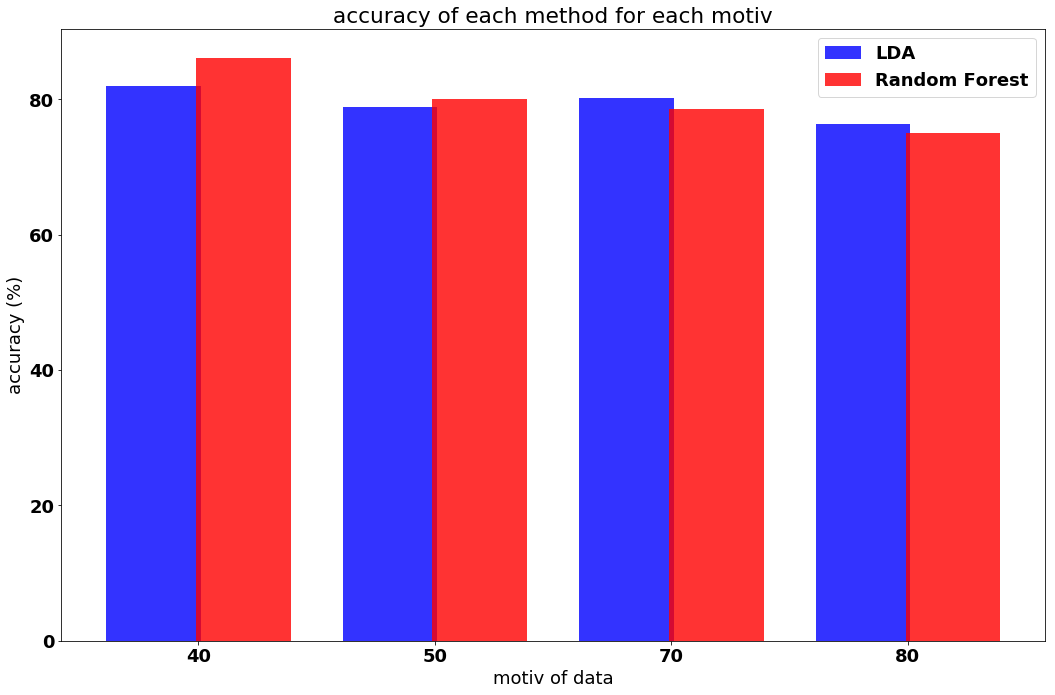

In [143]:
# Bar graph
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#data to plot
n_group = 4
LDA_score = (81.9, 78.9, 80.1, 76.4)
RF_score = (86.1, 80, 78.5, 75)

#create plot
fig, ax = plt.subplots()
index = np.arange(len(LDA_score))
width = 0.38
opacity = 0.8

rects1 = ax.bar(index - width/2, LDA_score, bar_width, alpha = opacity,
                color = 'b',
                label = 'LDA')
rects1 = ax.bar(index + width/2, RF_score, bar_width, alpha = opacity,
                color = 'r',
                label = 'Random Forest')
ax.set_xlabel('motiv of data')
ax.set_ylabel('accuracy (%)')
ax.set_title('accuracy of each method for each motiv')
ax.set_xticks(index)
ax.set_xticklabels(('40','50','70','80'))
plt.rcParams['figure.figsize'] = (15,10)
import matplotlib
font = {'family':'normal',
       'weight': 'bold',
       'size': '18'}
matplotlib.rc('font', **font)
ax.legend()
fig.tight_layout()
plt.show()